In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow import keras
import tensorflow as tf

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
data=pd.read_csv("/home/hemanth/Documents/DeepLearning/MLP/weatherHistory.csv")

In [3]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [5]:
data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [6]:
data['Precip Type'] = data['Precip Type'].replace(np.nan, 0)

In [7]:
data['Precip Type'].unique()

array(['rain', 'snow', 0], dtype=object)

In [8]:
#Change Yes=1 , and No = 0
data['Precip Type']=data['Precip Type'].map({'rain':1,'snow':2})
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,1.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,1.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,1.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,1.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,1.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
data.shape

(96453, 12)

In [10]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [11]:
dataset=data.drop(['Formatted Date','Summary', 'Precip Type','Daily Summary','Loud Cover'],axis=1)

In [12]:
dataset.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


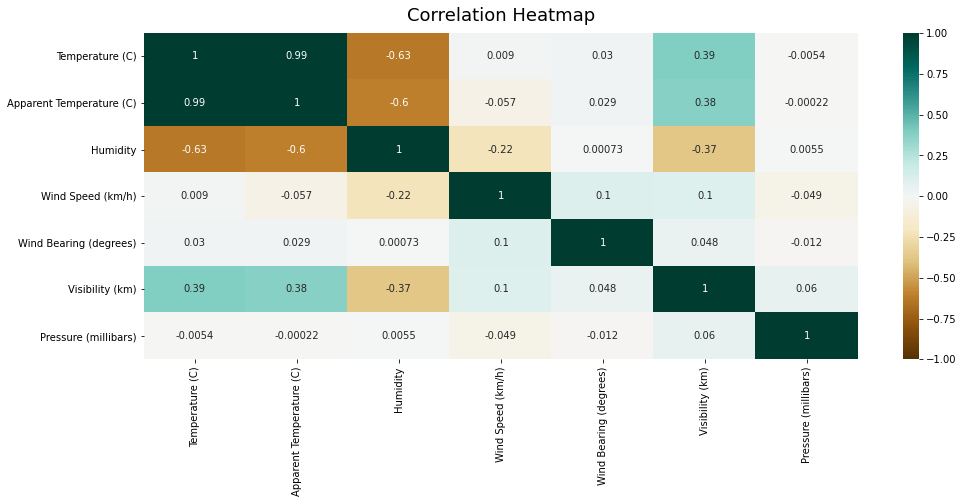

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [14]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [15]:
print(train_dataset.shape)
print(test_dataset.shape)

(77162, 7)
(19291, 7)


In [16]:
train_dataset.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

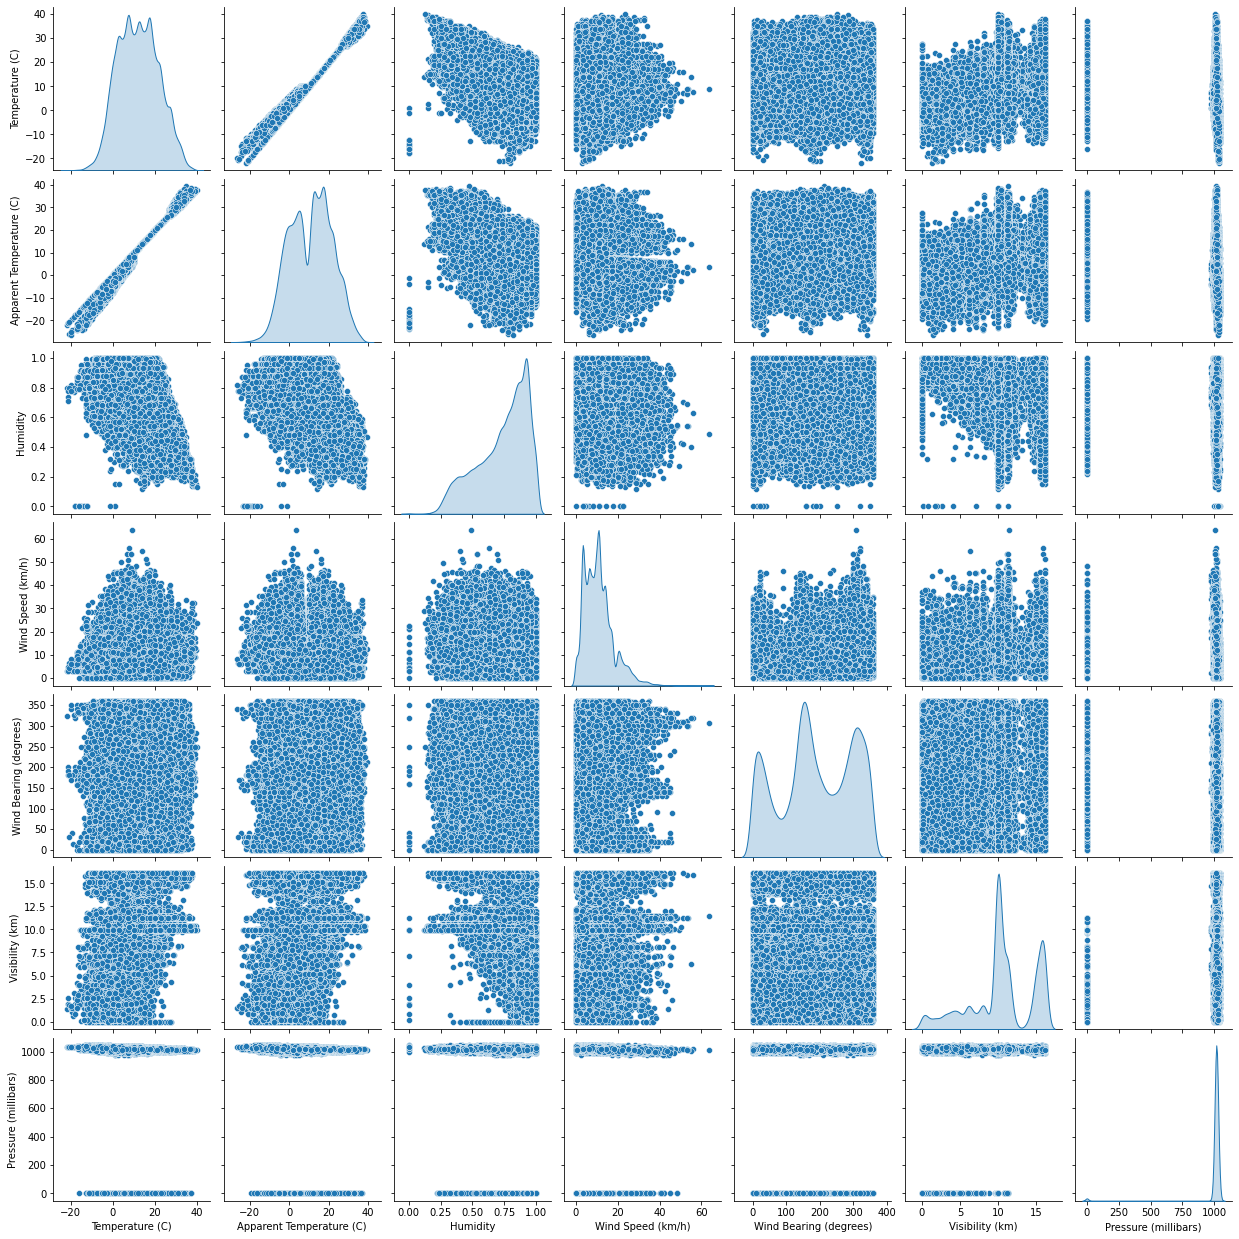

In [17]:
sns.pairplot(train_dataset[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']],diag_kind='kde')

In [18]:
train_stats=train_dataset.describe()
train_stats.pop('Temperature (C)')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Apparent Temperature (C),77162.0,10.871236,10.705145,-26.227778,2.311111,12.005556,18.844444,39.344444
Humidity,77162.0,0.734845,0.195519,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),77162.0,10.809056,6.896180,0.000000,5.876500,9.949800,14.119700,63.852600
Wind Bearing (degrees),77162.0,187.318615,107.375358,0.000000,115.000000,180.000000,290.000000,359.000000
Visibility (km),77162.0,10.351363,4.181697,0.000000,8.339800,10.046400,14.812000,16.100000
Pressure (millibars),77162.0,1003.337465,116.500344,0.000000,1011.890000,1016.430000,1021.070000,1046.380000


In [19]:
train_labels=train_dataset.pop('Temperature (C)')
test_labels=test_dataset.pop('Temperature (C)')

In [20]:
print(train_labels.shape)
print(test_labels.shape)

(77162,)
(19291,)


In [21]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [22]:
len(train_dataset.keys())

6

In [23]:
def build_model():
    model=keras.Sequential([
        layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),## input layer
        layers.Dense(64,activation='relu'),## hidden layer
        layers.Dense(1)#output
        
      ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,metrics=['mae','mse'])
    return model

In [24]:
model=build_model()
model

In [25]:
example_batch=normed_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[-0.15814026],
       [ 0.00724973],
       [ 0.02636025],
       [ 0.10828103],
       [ 0.07273708],
       [ 0.013158  ],
       [ 0.42649388],
       [ 0.07375391],
       [-0.19433476],
       [ 0.06425238]], dtype=float32)

In [27]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0288,  mae:0.1150,  mse:0.0288,  val_loss:0.0222,  val_mae:0.1123,  val_mse:0.0222,  
....................................................................................................
Epoch: 100, loss:0.0117,  mae:0.0600,  mse:0.0117,  val_loss:0.0972,  val_mae:0.2290,  val_mse:0.0972,  
....................................................................................................
Epoch: 200, loss:0.0099,  mae:0.0524,  mse:0.0099,  val_loss:0.0047,  val_mae:0.0304,  val_mse:0.0047,  
....................................................................................................
Epoch: 300, loss:0.0087,  mae:0.0464,  mse:0.0087,  val_loss:0.0097,  val_mae:0.0492,  val_mse:0.0097,  
....................................................................................................
Epoch: 400, loss:0.0076,  mae:0.0441,  mse:0.0076,  val_loss:0.0104,  val_mae:0.0712,  val_mse:0.0104,  
........................................................................

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,0.028804,0.114970,0.028804,0.022236,0.112345,0.022236,0
1,0.028430,0.114224,0.028430,0.009762,0.053054,0.009762,1
2,0.027546,0.112897,0.027546,0.142016,0.292646,0.142016,2
3,0.027163,0.110316,0.027163,0.097171,0.213671,0.097171,3
4,0.026719,0.110191,0.026719,0.032681,0.137032,0.032681,4


In [29]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.005607,0.033913,0.005607,0.008415,0.071096,0.008415,995
996,0.005673,0.033926,0.005673,0.009435,0.062737,0.009435,996
997,0.006058,0.034550,0.006058,0.023967,0.112180,0.023967,997
998,0.005805,0.034394,0.005805,0.008084,0.061400,0.008084,998
999,0.005595,0.033989,0.005595,0.015512,0.084540,0.015512,999


In [30]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter

Text(0, 0.5, 'MAE [Temperature (C)]')

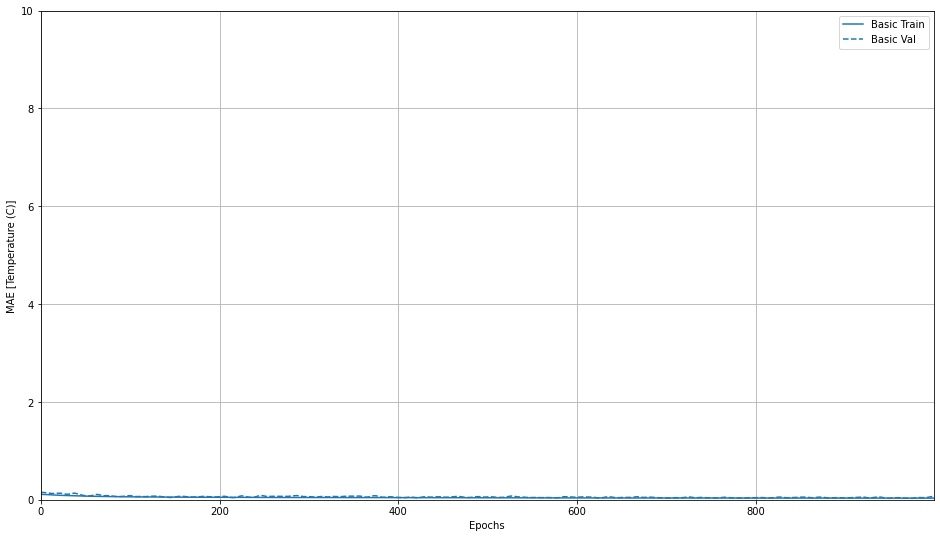

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Temperature (C)]')

Text(0, 0.5, 'MSE [Temperature (C)^2]')

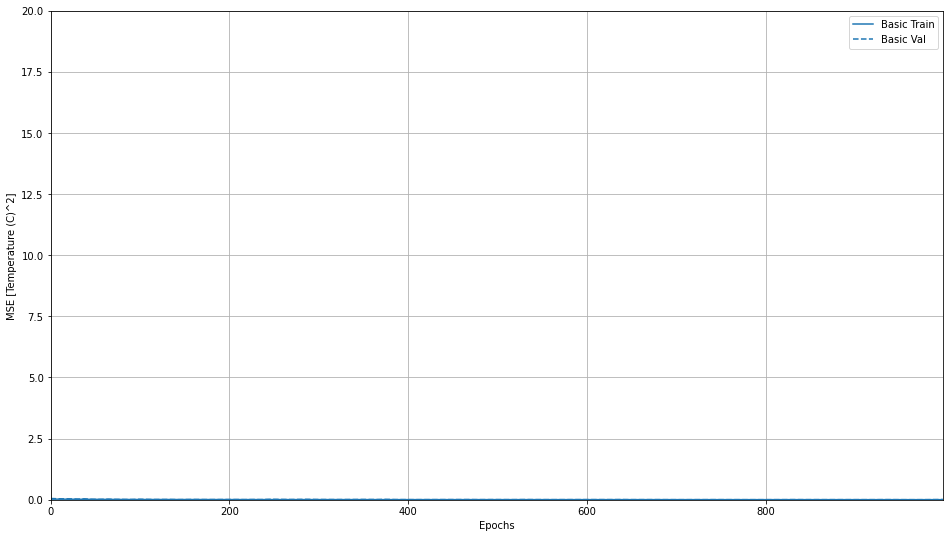

In [32]:
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [Temperature (C)^2]')

In [33]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:7.8032,  mae:1.0128,  mse:7.8032,  val_loss:0.1724,  val_mae:0.2951,  val_mse:0.1724,  
......................................

Text(0, 0.5, 'MAE [Temperature (C)]')

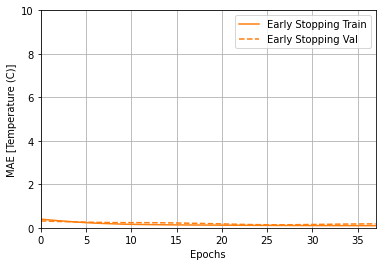

In [34]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Temperature (C)]')

In [35]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:10.2f} Temparature (C)".format(mae))

603/603 - 0s - loss: 0.0191 - mae: 0.1014 - mse: 0.0191
Testing set Mean Abs Error:       0.10 Temparature (C)


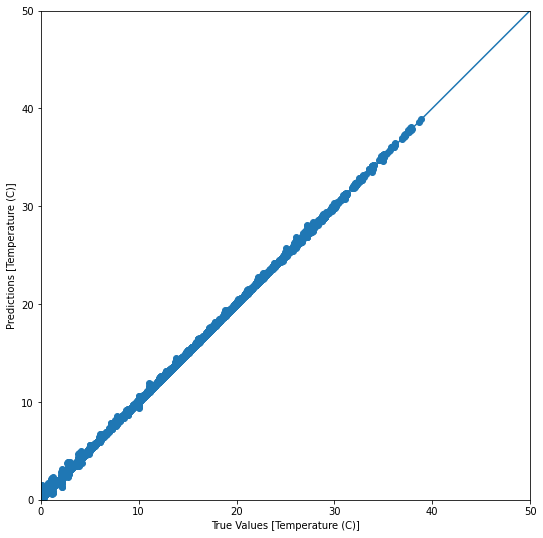

In [36]:
test_predictions = model.predict(normed_test_data).flatten()
plt.figure(figsize=(16,9))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Temperature (C)]')
plt.ylabel('Predictions [Temperature (C)]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

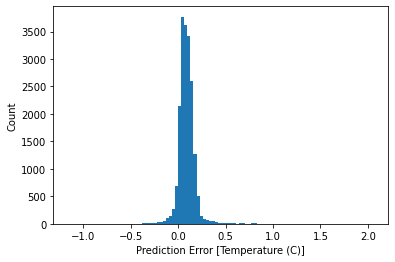

In [37]:
error = test_predictions - test_labels
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [Temperature (C)]")
_ = plt.ylabel("Count")